<h1>Introduction</h1><br>
* This dataset gives data about patients that shows on their appointment
    <br>Our mission is to understand and analyse the data<br>
    * We will give insights and try to predict from the given features the showing observations

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('appoitment.csv')
data.shape
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
data.duplicated().sum()

0

In [4]:
data['PatientId'].nunique()

62299

In [5]:
#duplicateed data of showing or not with the same patient id

In [6]:
data[['PatientId','No-show']].duplicated().sum()

38710

In [7]:
#data inspection to check the data status

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#no missing values

In [10]:
#getting fast describtion about the data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
mask=data.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#Data Cleaning

In [13]:
data.drop(index=99832,inplace=True)
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
data.drop_duplicates(['PatientId','No-show'],inplace=True)

In [15]:
data.shape

(71816, 14)

In [16]:
#dropping unnesscary data for analysis
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [17]:
#exploration data

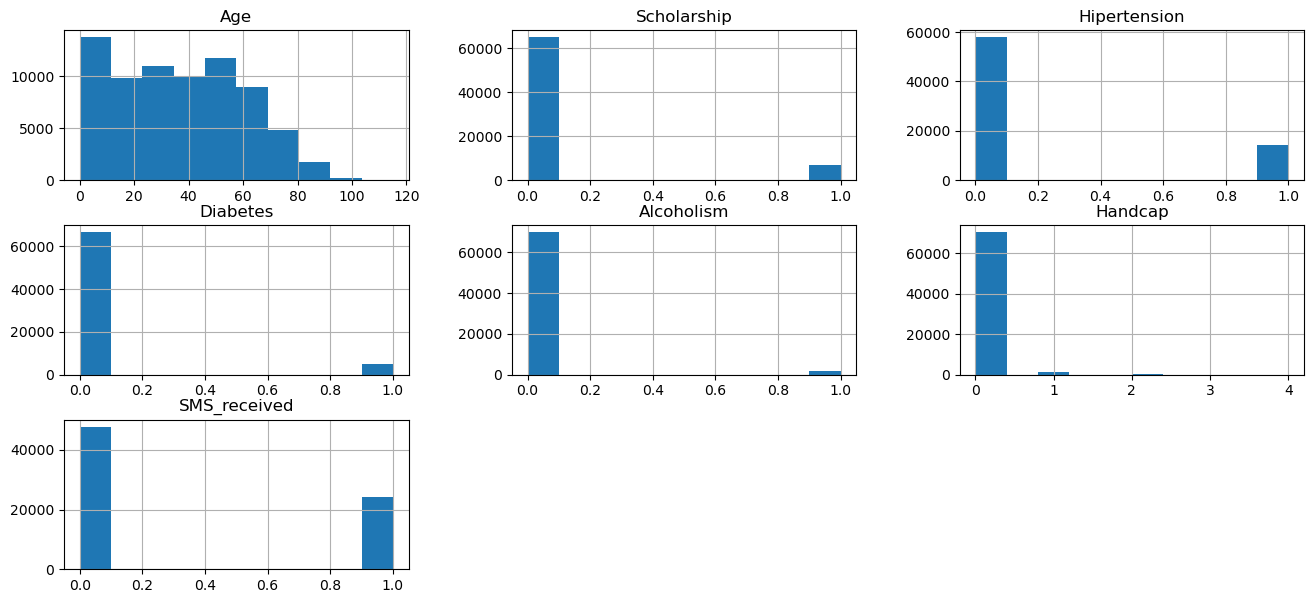

In [18]:
data.hist(figsize=(16,7));

In [19]:
data['No-show'] = data['No-show'].astype(str)
data['No-show'].dtype

dtype('O')

In [20]:
#counting Showed patients
show=data['No-show']=='No'
data[show].count()
noshow=data['No-show']=='Yes'
data[show].count(),data[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No-show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

In [43]:
data[show].mean(),data[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 No-show          0.000000
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 No-show          1.000000
 dtype: float64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


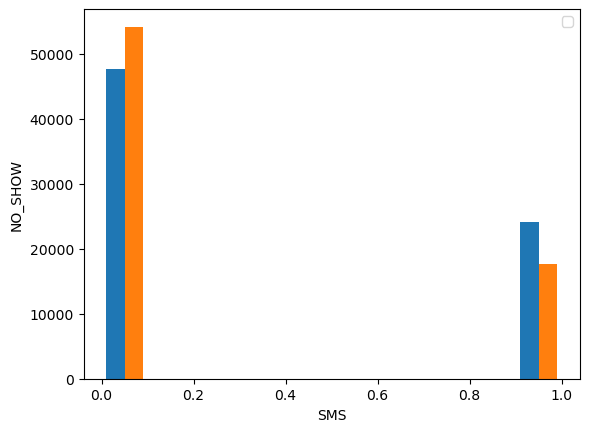

In [45]:
#people who does not show have higher mean of recieving SMS
data['No-show'].replace({'No':0,'Yes':1},inplace=True)
plt.hist(data[['SMS_received','No-show']])
plt.xlabel('SMS')
plt.ylabel('NO_SHOW')
plt.legend()
plt.show()

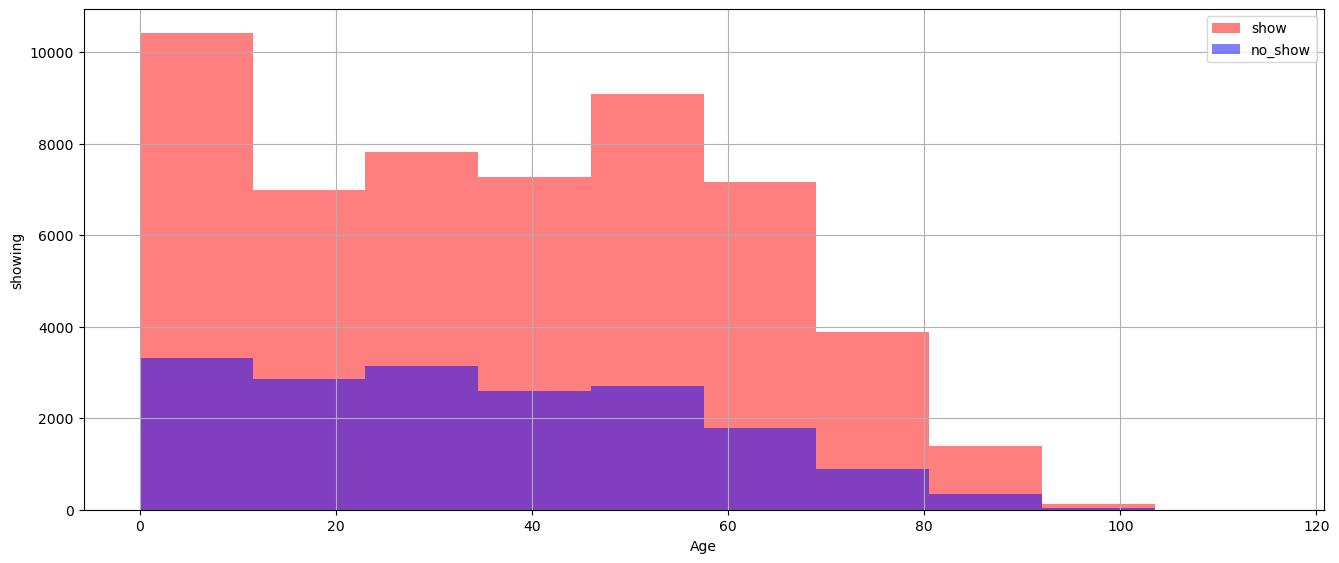

In [23]:
plt.figure(figsize=[16,6.5])
data['Age'][show].hist(label='show',color='red',alpha=0.5)
data['Age'][noshow].hist(label='no_show',color='blue',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('showing')
plt.legend();
plt.show()

In [24]:
#age is a factor while age decrease the no show decrease

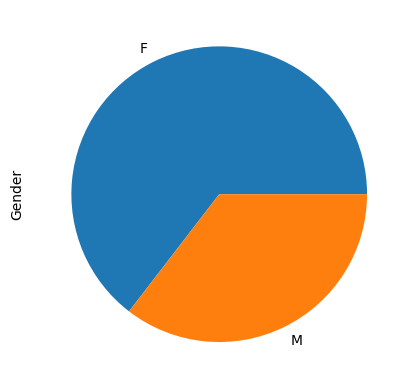

In [25]:
data['Gender'][show].value_counts(normalize=True).plot(kind='pie');

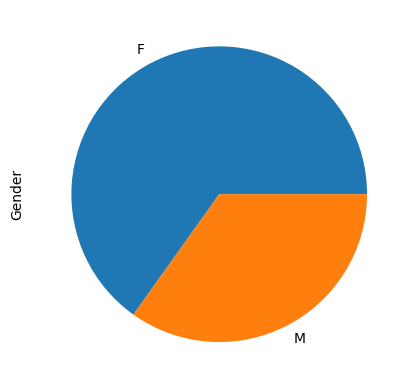

In [26]:
data['Gender'][noshow].value_counts(normalize=True).plot(kind='pie');
#gender is not affecting statistics but we can conculode that femalas are the most clients

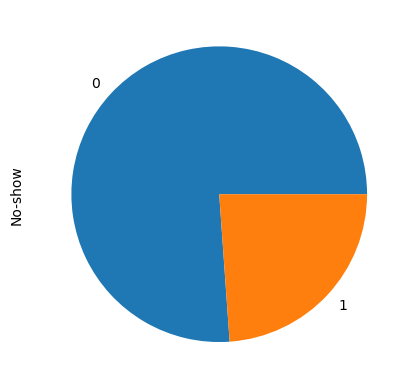

In [27]:
data[(data.Age<10)&(data.Gender=='F')]['No-show'].value_counts(normalize=True).plot(kind='pie');
#age less than 10(kids) their parents are welling to attend more

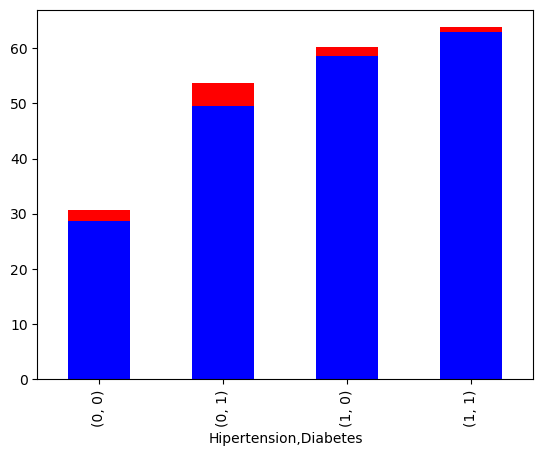

In [28]:
#does showing and diseases affect showing ?
data[show].groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red');
data[noshow].groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue');
#dieases are not affecting  
#age is affecting

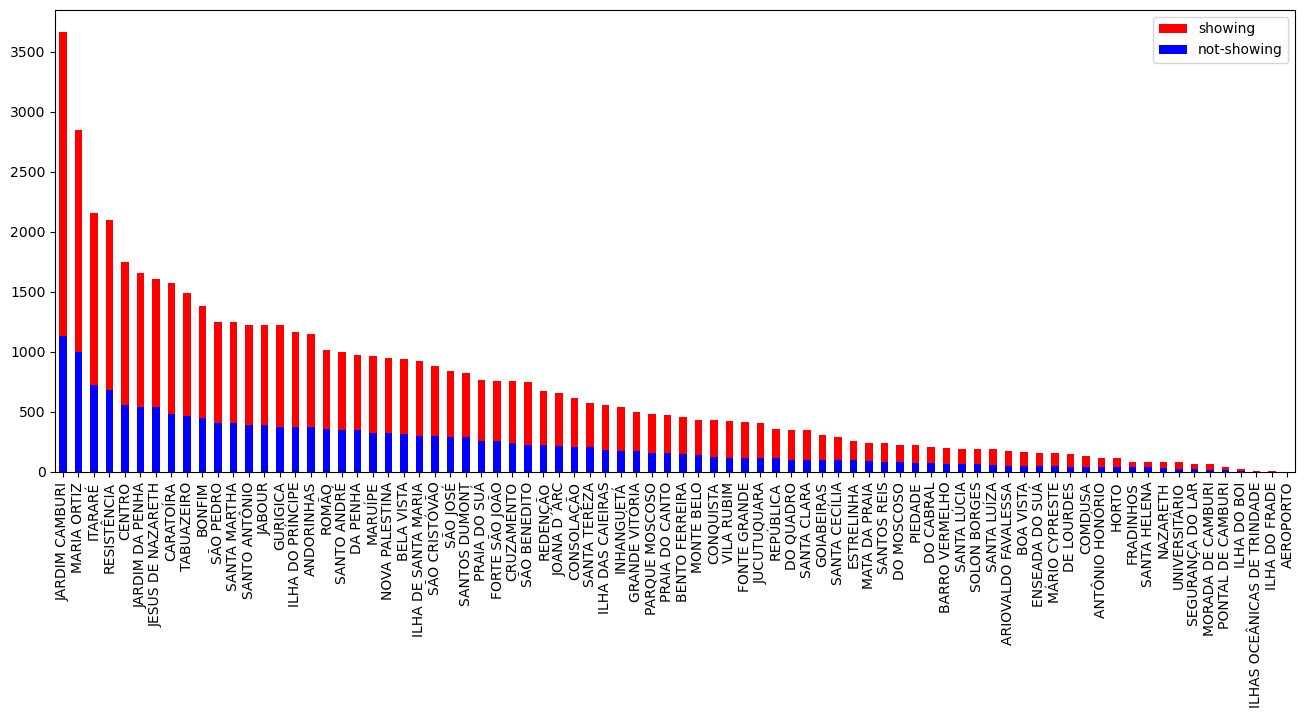

In [29]:
#does neighborhood afffect showing
plt.figure(figsize=[16,6])
data[show]['Neighbourhood'].value_counts().plot(kind='bar',color='red',label='showing');
data[noshow]['Neighbourhood'].value_counts().plot(kind='bar',color='blue',label='not-showing');
plt.legend()
plt.show()
#obviously data is left skewed which means that neighborhood affect the showing of patients

<h1>Concolusion</h1><br>
Neigndoumoon has a great effect on atendence of not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate
‘Number of showing patients from specific neighbourhood is afected by receiving SMS and Ages.

‘Age has a clear infuence on the showing rate Ages from 0-8 are the most showing(parents taking care of he Kids) than from 45.86 and that has least attending
‘are wom above 65 years fd

‘Number of showing patents without receiving sms ' greater than showng parents wah receiving sms , which means that we need to fix our SMS campaign

Limitations.
No clear correlation between showing and gender, chronic iseases ,enrllement in the welfare program


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
city = LabelEncoder()
gender=LabelEncoder()
data.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [56]:
x=data[['Age', 'Neighbourhood','Gender']]
y=data['No-show']

In [58]:
x['Neighbourhood']=city.fit_transform(x.Neighbourhood)
x['Gender']=gender.fit_transform(x.Gender)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

In [61]:
model= SVC(C=1)
model.fit(x_train,y_train),
model.score(x_train,y_train),model.score(x_test,y_test)

(0.7553748468307898, 0.7527291968363596)

<H1>ML Summary</H1><br>
We choose Age,Neighberhood,Gender as our main features.<br>
We get accuracy of 75% which is good predictor with data with such high cardinality